In [29]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [37]:
folder = '../../results/'

figs = os.path.join(folder, 'figs')
file = os.path.join(folder, 'raw-results.csv')

df = pd.read_csv(file)


sns.set_style("ticks")

sns.set_context("paper", font_scale=2.8)   

In [38]:
df_invo = df[df['Experiment'] == 'INVO']

<Figure size 432x288 with 0 Axes>

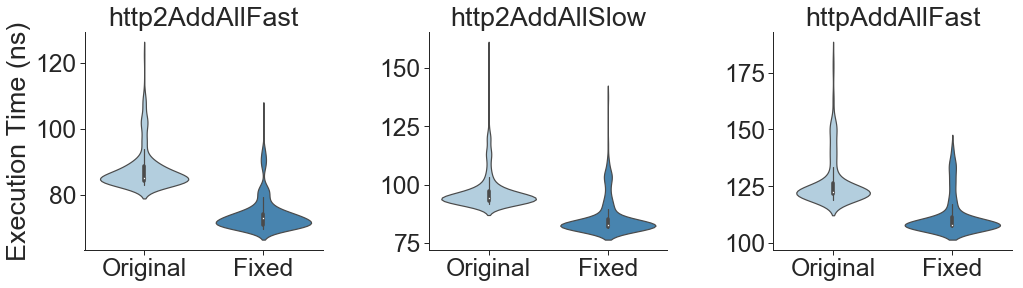

In [39]:
plt.clf()

sns.set_style("ticks")


affected = ['httpAddAllFast', 'http2AddAllFast', 'http2AddAllSlow'] 
params = [' (exampleHeader = THREE)']
df_invo_p = df_invo[df_invo['Full params'] == ' (exampleHeader = THREE)']
       
headers_bench = df_invo_p.query('Class=="HeadersBenchmark" and Method in @affected')
cat = sns.catplot(data=headers_bench, col='Method', y='Score', x='Version', kind='violin', sharey=False, aspect=1, 
                  legend=False, palette='Blues')
cat.set_axis_labels("", "Execution Time (ns)")
cat.set_xticklabels(['Original', 'Fixed'])
cat.set_titles("{col_name}")

#plt.legend(bbox_to_anchor=(-2.3, .95), loc=2, borderaxespad=0.)

#plt.show()
plt.savefig(os.path.join(figs, 'netty-directlyaffected.pdf'))


C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


<Figure size 432x288 with 0 Axes>

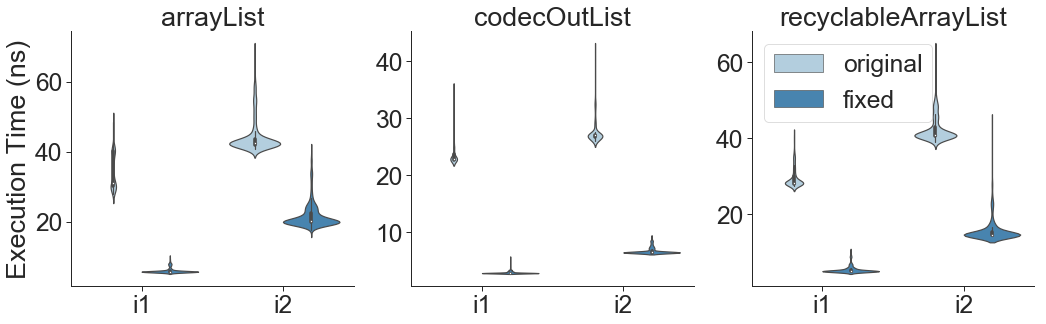

In [40]:
%matplotlib inline
plt.clf()

sns.set_style("ticks")

import math

codec_bench = df_invo[df_invo['Class'] == 'CodecOutputListBenchmark']

# From Thrpt to Execution time (ns)
codec_bench['Score Norm'] = 1e9 / codec_bench['Score']
codec_bench = codec_bench.replace('fixed_full', 'fixed')

#headers_table = pd.pivot_table(data=headers_bench, values='Score', index=['Version','Method', 'Iteration', 'Fork', 'Trial'])
cat = sns.catplot(data=codec_bench, x='Full params', y='Score Norm', col='Method', hue='Version', 
                  ci=95, kind='violin', sharey=False, legend_out=False, legend=False, aspect=1, palette='Blues')
cat.set_axis_labels("", "Execution Time (ns)")
cat.set_xticklabels(['i1', 'i2'])
cat.set_titles("{col_name}")

plt.legend(loc='upper left')
# Put a legend to the right side
# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5), ncol=1)

#plt.show()
plt.savefig(os.path.join(figs, 'netty-codecoutputlistbenchmark.pdf'))



In [34]:
aggr_file = os.path.join(folder, 'summarized-results.csv')

aggr_df = pd.read_csv(aggr_file)
aggr_invo = aggr_df[aggr_df['Experiment'] == 'INVO']

### Heatmap plots

In [35]:
bench = aggr_invo[aggr_invo['Class'] == 'HeadersBenchmark']

table = pd.pivot_table(data=bench, index='Method', columns='Full params', values='New Factor')

In [36]:
import matplotlib.colors as colors

pos = np.linspace(1, 5, 20)
neg = np.linspace(-5, -1, 20)

bounds = np.append(neg, 0) # Add zero
bounds = np.concatenate((bounds, pos))
bounds = [-5,-4,-3,-2,-1.0,1.0,2,3,4,5]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
plt.clf()
clrs = sns.color_palette("RdBu_r", 50)

sns.heatmap(data=table,annot=False, fmt="2.0%", center=0, norm=norm, cmap=clrs, robust=True, linewidths=.5, vmin=-3, vmax=3)

plt.show()

NameError: name 'np' is not defined